In [1]:
from google.colab import drive
drive.mount("/content/drive")

Mounted at /content/drive


In [2]:
%pip install underthesea
%pip install pandas

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 20.9/20.9 MB 62.6 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.1/1.1 MB 68.8 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 657.8/657.8 kB 55.5 MB/s eta 0:00:00


In [19]:
FOLDER_PATH = "/content/drive/MyDrive/Phân tích sở thích dựa trên comments fb/Fanpage/"
STOP_WORDS_PATH = "/content/drive/MyDrive/Phân tích sở thích dựa trên comments fb/Group/vietnamese-stopwords.txt"

In [20]:
import pickle
POST_LIST_PATH = FOLDER_PATH + 'post_list_fanpage.pkl'
CMT_LIST_PATH = FOLDER_PATH + 'comments_list_fanpage.pkl'
# Đọc danh sách từ tập tin
with open(POST_LIST_PATH, 'rb') as f:
    post_list = pickle.load(f)

with open(CMT_LIST_PATH, 'rb') as f:
    cmt_list = pickle.load(f)

**Phân tích tần suất từ**

In [23]:
import re
import nltk
# nltk.download('punkt')
# from nltk.tokenize import word_tokenize
from collections import Counter
from nltk.corpus import stopwords
from underthesea import word_tokenize

# Chuỗi các comment và bài viết
comments = []
for item in cmt_list:
    comments.append(str(item.get('text')))
# for item in post_list:
#     comments.append(str(item.get('text')))
# Loại bỏ đường link
comments = [re.sub(r'http\S+', '', comment) for comment in comments]

# Loại bỏ kí tự đặc biệt và biểu tượng cảm xúc
comments = [re.sub(r'[^\w\s]', '', comment) for comment in comments]

# Kết hợp tất cả các comment và nội dung bài viết thành một chuỗi duy nhất
all_text = ' '.join(comments)

# Tokenize chuỗi thành các từ riêng lẻ
# tokens = word_tokenize(all_text)
tokens = word_tokenize(all_text)

# Chuyển đổi các từ thành chữ thường
lowercase_tokens = [token.lower() for token in tokens]
print(tokens)
# Loại bỏ các stop words (từ không mang nhiều ý nghĩa)
# stop_words = set(stopwords.words('english'))

# Danh sách stopwords tiếng Việt
with open(STOP_WORDS_PATH, "r", encoding="utf-8") as file:
    stopwords_vietnamese = file.readlines()

# Loại bỏ khoảng trắng và ký tự xuống dòng từ mỗi dòng văn bản
stopwords_vietnamese = [line.strip() for line in stopwords_vietnamese]
stopwords_vietnamese1 = [
    "là", "của", "và", "với", "trong", "để", "có", "không", "được", "này",
    "từ", "một", "cũng", "đã", "lại", "như", "đang", "đến", "sẽ", "nếu",
    "vì", "ở", "còn", "nữa", "đấy", "rồi", "hay", "nào", "lên", "xuống",
    "thì", "tới", "năm", "ngày", "tháng", "giờ", "phút", "giây", "trước",
    "sau", "thường", "thậm", "thà", "thì", "tuy", "từng", "vẫn", "vừa",
    "đúng", "sang", "nhưng", "thế", "cả", "về", "theo", "đó", "nên", "ra",
    "rất", "lúc", "lại", "này", "đấy", "vậy", "như", "tại", "thế", "này",
    "đấy", "chỉ", "từng", "vì", "vậy", "đấy", "này", "thế", "thì", "a", "e", "nguyễn", "none", "none none", 'ạ em',
    'đi', 'ok', 'ko', 'đc', 'nguyen', 'nè', 'lắm', 'xong', 'chỗ', 'thử', 'nha', '10'
    # Thêm các từ stopwords tiếng Việt khác vào đây
]
stopwords_vietnamese2 = ['0', '1', '2', '3', '4', '5', '6', '7', '8', '9','a', 'b', 'c', 'd', 'e', 'f', 'g', 'h', 'i', 'j', 'k', 'l', 'm', 'n', 'o', 'p', 'q', 'r', 's', 't', 'u', 'v', 'w', 'x', 'y', 'z']

stopwords_vietnamese = stopwords_vietnamese + stopwords_vietnamese1 + stopwords_vietnamese2
# Loại bỏ các stop words tiếng Anh và tiếng Việt
filtered_tokens = [token for token in lowercase_tokens if token not in stopwords_vietnamese]

# Đếm tần suất xuất hiện của từng từ
word_freq = Counter(filtered_tokens)

# In các từ khóa phổ biến nhất và tần suất của chúng
top_keywords = word_freq.most_common(20)
for keyword, freq in top_keywords:
    print(keyword, "-", freq)

['Nhớ', 'là', 'có', 'ai', 'đó', 'khi', 'lên', 'phát biểu', 'cũng', 'bảo', 'mình', 'genz', 'Ai', 'biết', 'tên', 'phim', 'này', 'giúp', 'mình', 'với', 'mình', 'cảm ơn', 'ạ', 'mình', 'có', 'việc', 'ạ', 'Về', 'chạy', 'SM', 'à', 'Tuyệt lắm', 'Anh', 'Vượng', 'ơi T', 'muốn', 'đổi', 'xeeee', 'Hy vọng', 'sẽ', 'tiếp cận', 'được', 'nhiều', 'nước', 'hơn', 'Chúc mừng', 'vinfast', 'nhé', 'lúc nào', 'ra mắt', 'xe', 'cũng', 'hoành tráng', 'cả', 'Bán ko', 'đc', 'đến', 'nổi', 'cho', 'lun', 'à', 'Xe', 'đẹp', 'người', 'cũng', 'đẹp', 'haha', 'Ai', 'biết', 'tên', 'phim', 'này', 'giúp', 'mình', 'với', 'mình', 'cảm ơn', 'ạ', 'mình', 'có', 'việc', 'ạ Tôy', 'muốn', 'đi', 'coi', 'để', 'soi', 'xem', 'ông', 'này', 'có', 'pick', 'nhầm', '2', 'con', 'đực', 'hoặc', '2', 'con cái', 'lên', 'tàu', 'ko', 'Ra', 'tết', 'là', 'đã', 'bắt đầu', 'cày', 'kpi', 'phim', 'rồi', 'Ra', 'tết', 'lại', 'có', 'phim', 'hay', 'để', 'thưởng thức', 'rồi', 'Lại', 'có', 'phim', 'mới', 'rồi', 'Lại', 'cháy', 'vé', 'cho', 'xem', 'Mê', 'quá', 'Nh

In [26]:
# Import thư viện WordCloud
from wordcloud import WordCloud
from pathlib import Path
import os
from wordcloud import WordCloud, STOPWORDS
import matplotlib.pyplot as plt

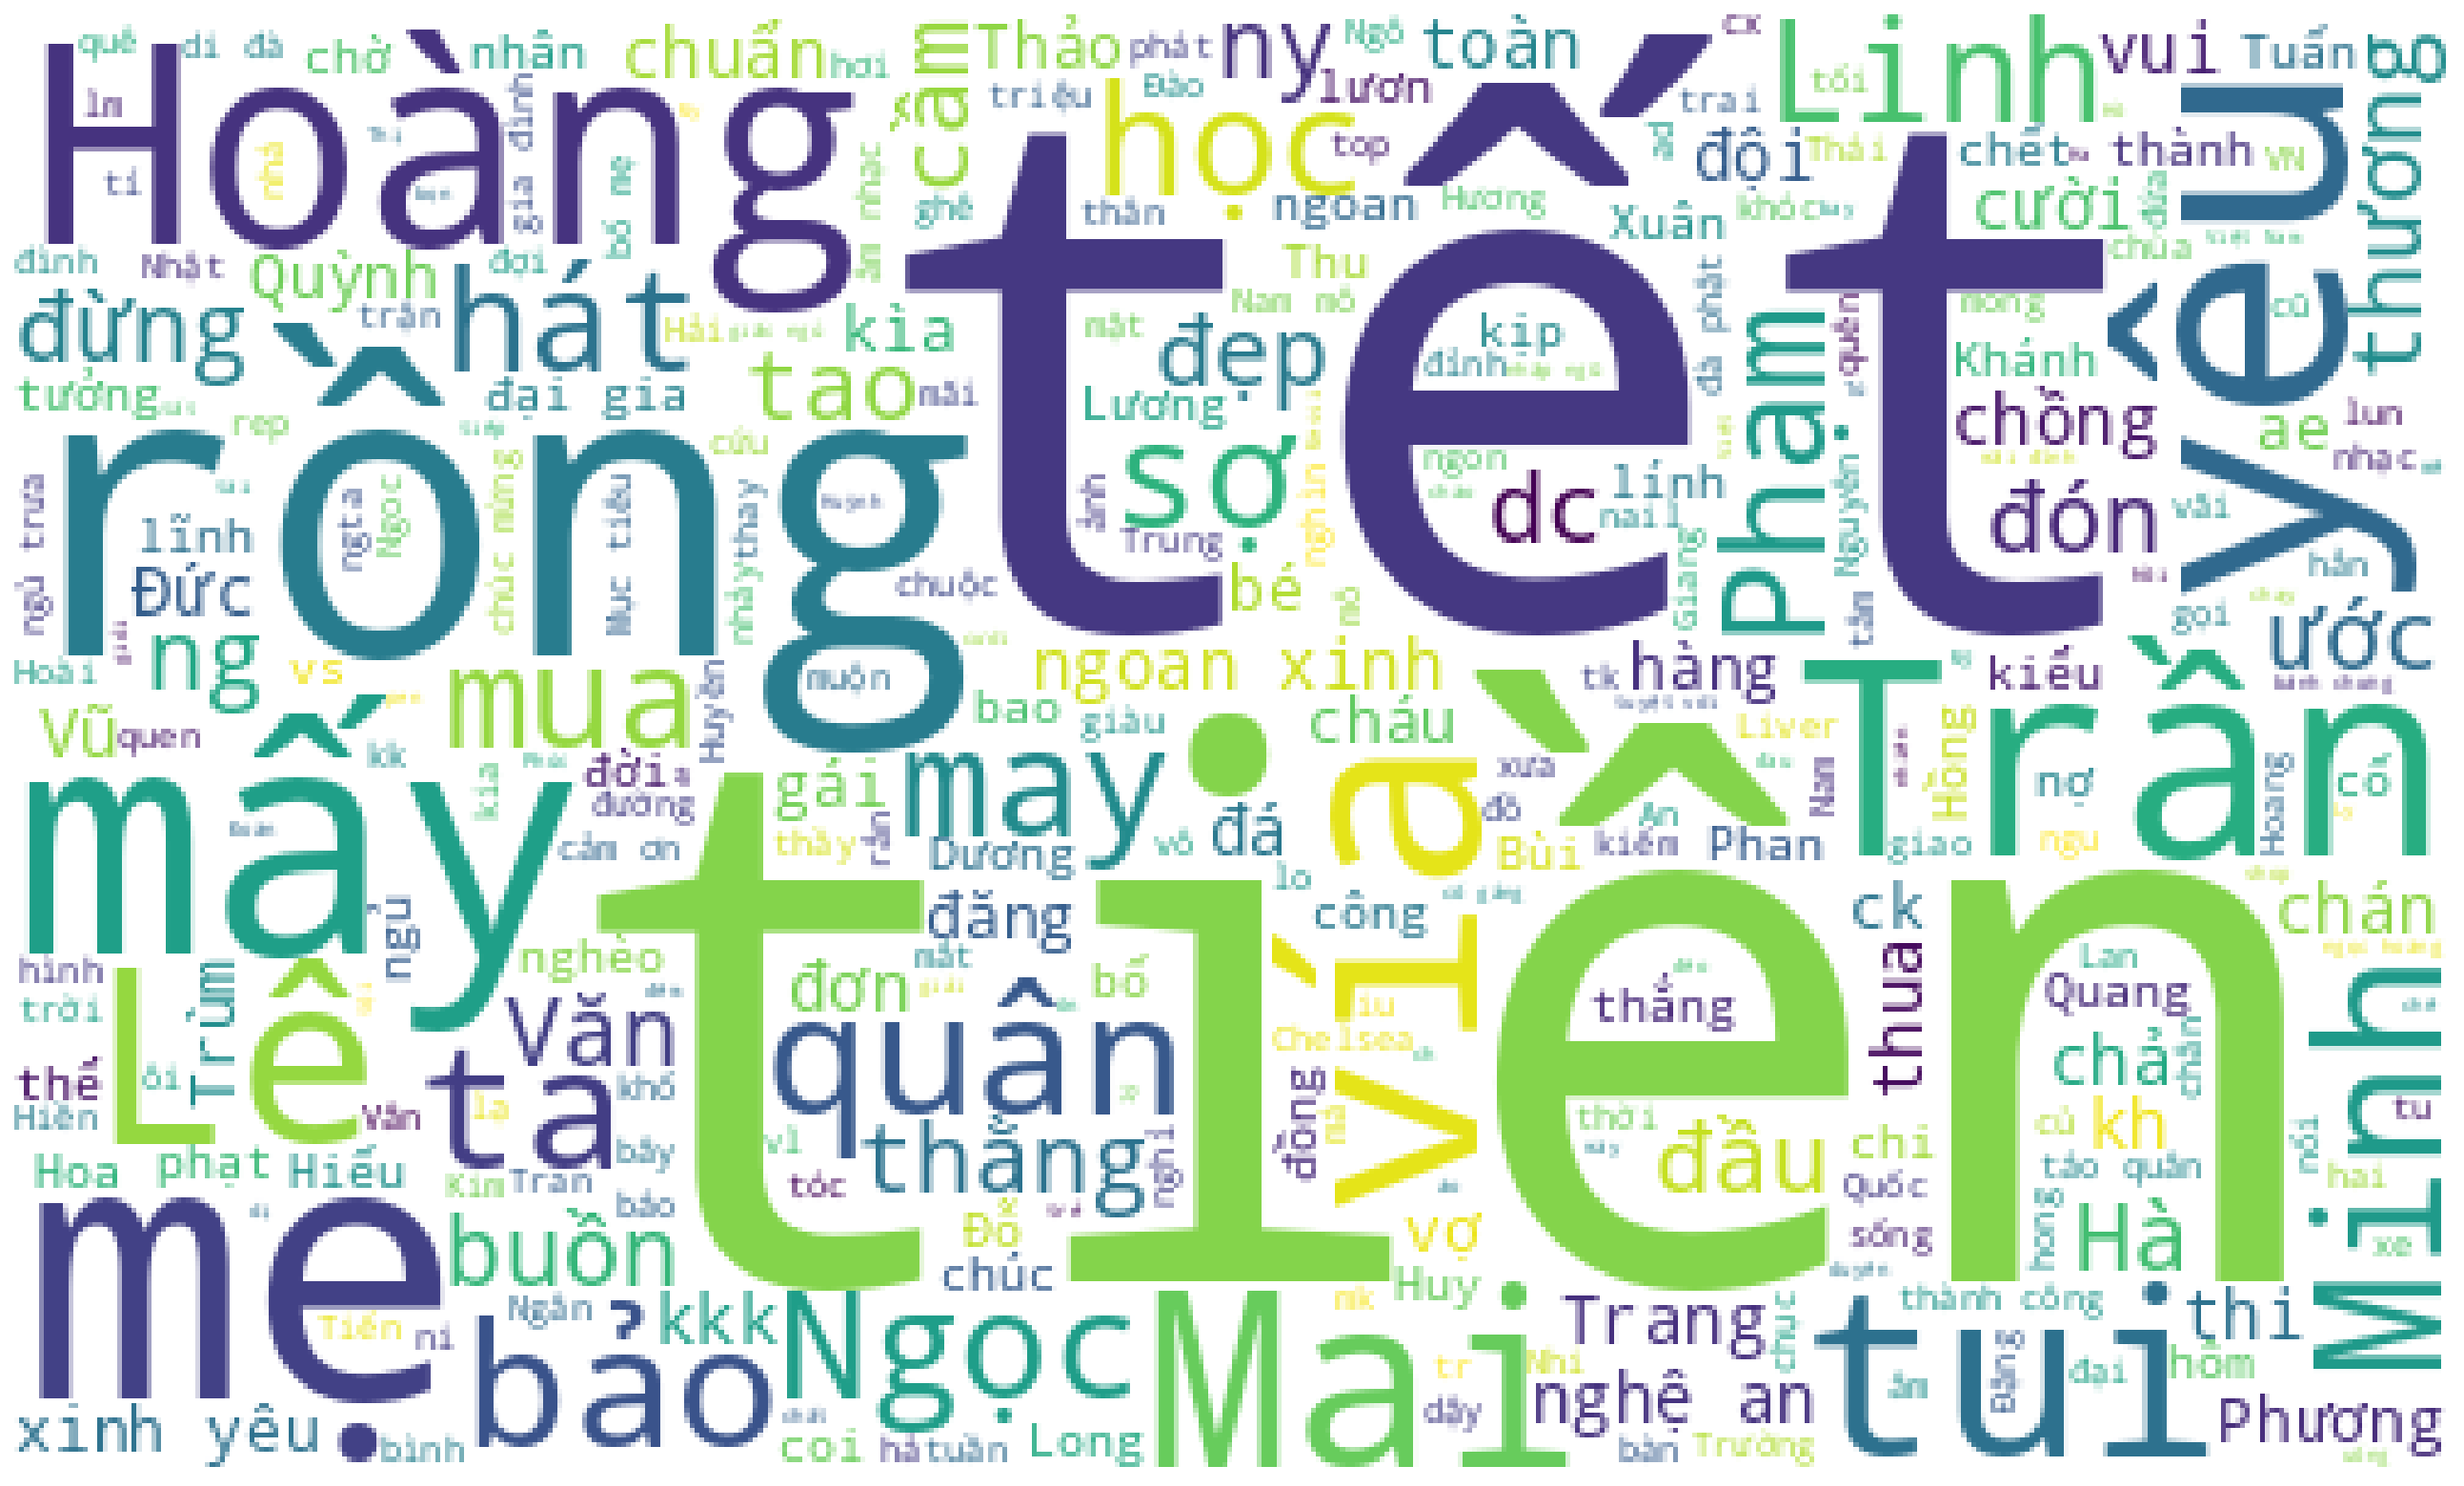

In [27]:
wordcloud = WordCloud(stopwords=stopwords_vietnamese,
                          background_color='white',
                      max_words=300,
                      width=500, height=300
                         ).generate(all_text)
plt.figure(figsize=(40,20))
plt.clf()
plt.imshow(wordcloud)
plt.axis('off')
plt.show()

**Phân tích độ tương tác theo ngày**



In [30]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [31]:
main_info_post = []
for item in post_list:
    new_item = {
        "postId": item["postId"],
        "time": item["time"],
        "likes": item["likes"],
        "comments": item["comments"],
        "shares": item["shares"],
        "text_post": item["text"],
    }
    main_info_post.append(new_item)


# Hàm khóa để trích xuất giá trị "time" và chuyển đổi thành đối tượng datetime
def key_func(item):
    from datetime import datetime
    return datetime.fromisoformat(item["time"].replace("Z", "+00:00"))

# Sắp xếp mảng theo thứ tự thời gian từ bé đến lớn
sorted_main_info_post = sorted(main_info_post, key=key_func)
df = pd.DataFrame(sorted_main_info_post)
print(df.to_string(index=False))

         postId                     time  likes  comments  shares                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                       

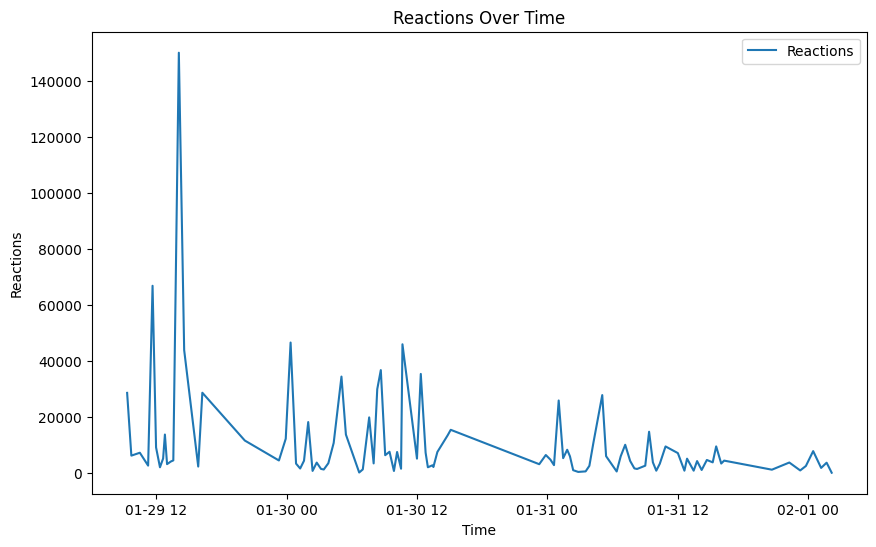

In [32]:
# Tính tổng số phản ứng (react)
df['react'] = df['likes'] + df['shares'] + df['comments']

# Chuyển đổi cột 'time' sang dạng datetime
df['time'] = pd.to_datetime(df['time'])

# Sắp xếp DataFrame theo cột 'time'
df.sort_values('time', inplace=True)

# Thiết lập kích thước và định dạng của biểu đồ
plt.figure(figsize=(10, 6))
plt.xlabel('Time')
plt.ylabel('Reactions')

# Vẽ biểu đồ
plt.plot(df['time'], df['react'], label='Reactions')

# Hiển thị chú thích
plt.legend()

# Đặt tiêu đề cho biểu đồ
plt.title('Reactions Over Time')

# Hiển thị biểu đồ
plt.show()

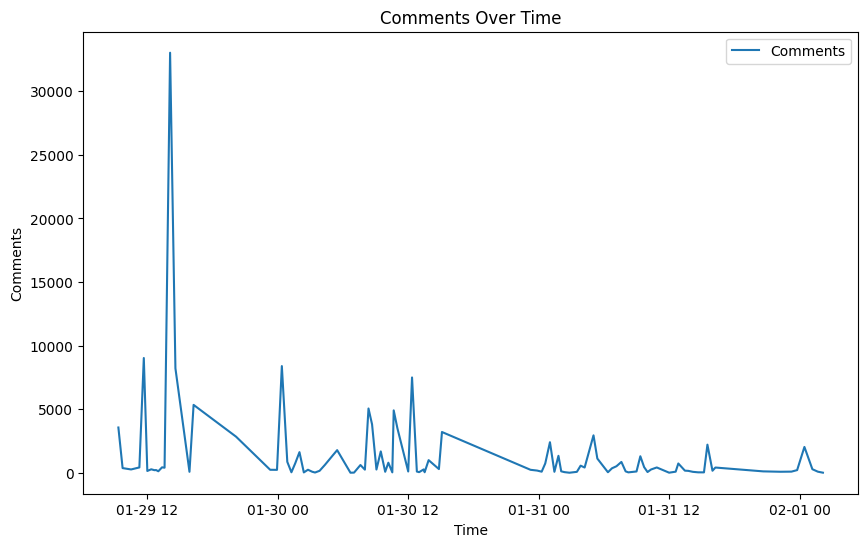

In [33]:
# Chuyển đổi cột 'time' sang dạng datetime
df['time'] = pd.to_datetime(df['time'])

# Sắp xếp DataFrame theo cột 'time'
df.sort_values('time', inplace=True)

# Thiết lập kích thước và định dạng của biểu đồ
plt.figure(figsize=(10, 6))
plt.xlabel('Time')
plt.ylabel('Comments')

# Vẽ biểu đồ
plt.plot(df['time'], df['comments'], label='Comments')

# Hiển thị chú thích
plt.legend()

# Đặt tiêu đề cho biểu đồ
plt.title('Comments Over Time')

# Hiển thị biểu đồ
plt.show()

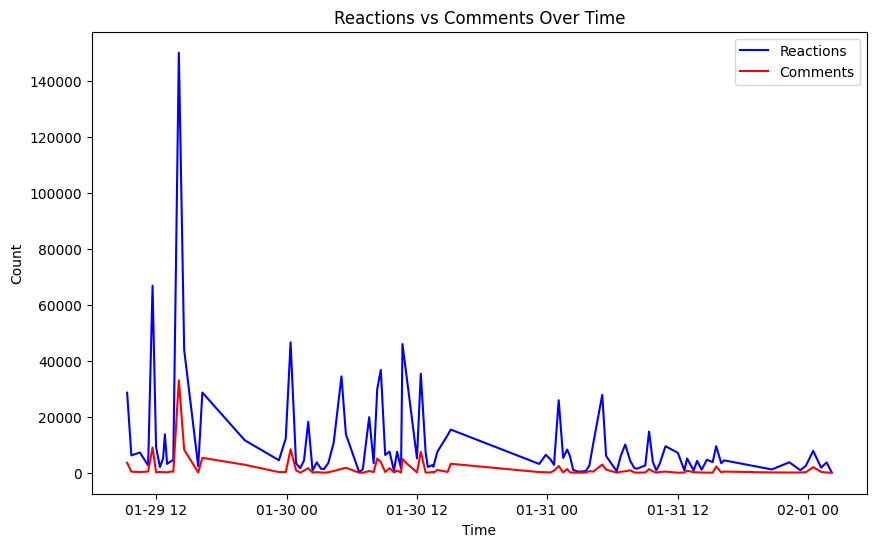

In [34]:
#  Tính tổng lượt tương tác cảm xúc
df['react'] = df['likes'] + df['shares'] + df['comments']

# Chuyển đổi cột 'time' sang dạng datetime
df['time'] = pd.to_datetime(df['time'])

# Sắp xếp DataFrame theo cột 'time'
df.sort_values('time', inplace=True)

# Thiết lập kích thước và định dạng của biểu đồ
plt.figure(figsize=(10, 6))
plt.xlabel('Time')
plt.ylabel('Count')

# Vẽ biểu đồ
plt.plot(df['time'], df['react'], color='blue', label='Reactions')
plt.plot(df['time'], df['comments'], color='red', label='Comments')

# Hiển thị chú thích
plt.legend()

# Đặt tiêu đề cho biểu đồ
plt.title('Reactions vs Comments Over Time')

# Hiển thị biểu đồ
plt.show()

In [35]:
# Tìm các bài viết chưa 1 từ khóa nào đó

res=[]
for i in main_info_post :
  if "thời tiết" in i['text_post']: res.append(i)
df_find_post = pd.DataFrame(res)
print(df_find_post.to_string(index=True))

            postId                      time  likes  comments  shares                                                                                                                               text_post
0  695705029411269  2024-01-31T23:46:36.000Z   2255       209      36                                                                                          Loại thời tiết khó chịu nhất đã quay trở lại 🥲
1  694379626210476  2024-01-29T15:52:42.000Z   2211        75       9  Nhìn thì tưởng bộ ảnh bình thường nhưng đây là concept ảnh cưới của một cặp đôi tại Hà Nội giữa thời tiết 7 độ C 🤣🤣🤣\n\nTheo: VTC News
